In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("C:\DataScience Assignments\delivery_time.csv");
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Shree\AppData\Local\Temp\ipykernel_10464\431705295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

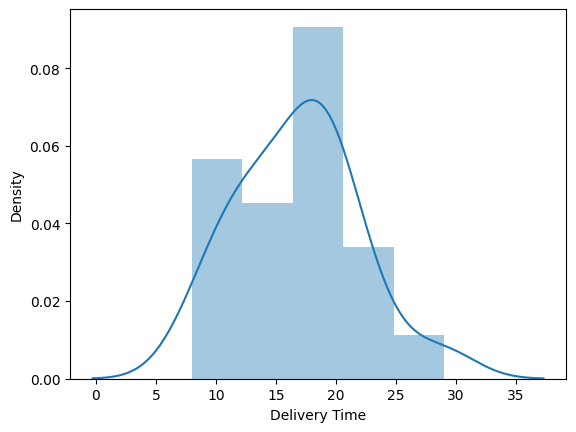

In [5]:
import seaborn as sns
sns.distplot(df['Delivery Time'])

C:\Users\Shree\AppData\Local\Temp\ipykernel_10464\2481827356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

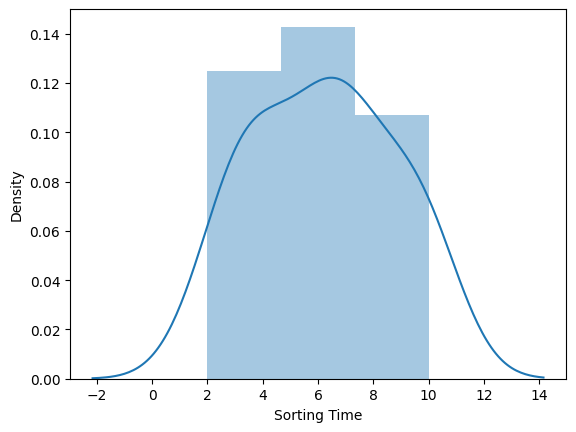

In [6]:
sns.distplot(df['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

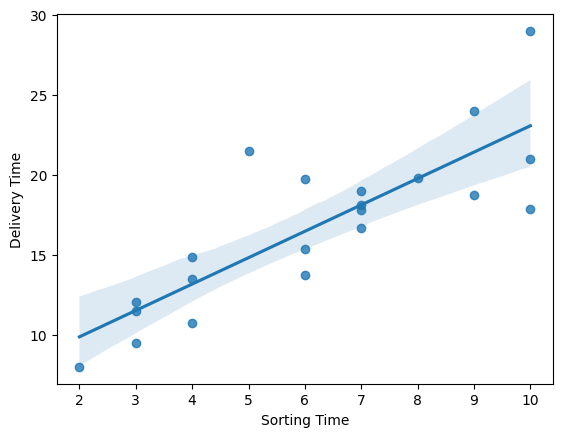

In [7]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=df)

In [8]:
df=df.rename({'Delivery Time':'deliver_time','Sorting Time':'sorting_time'},axis=1)
df

,deliver_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
import statsmodels.formula.api as smf
model=smf.ols("deliver_time~sorting_time",data=df).fit()

In [10]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
6.582734+1.649020*10

23.072933999999997

In [12]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [13]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [14]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [15]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [16]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [20]:
model_1=smf.ols("np.log(deliver_time)~sorting_time",data=df).fit()

<Axes: xlabel='sorting_time', ylabel='deliver_time'>

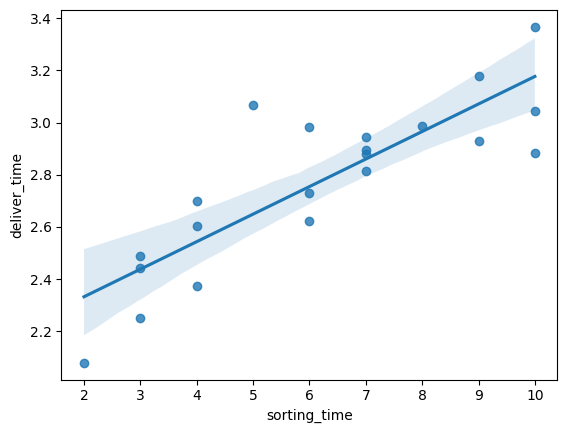

In [23]:
sns.regplot(x=df['sorting_time'],y=np.log(df['deliver_time']))

In [24]:
model_1.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [25]:
print(model_1.tvalues)
print(model_1.pvalues)

Intercept       20.601357
sorting_time     6.836088
dtype: float64
Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64


In [26]:
print(model_1.rsquared)
print(model_1.rsquared_adj)

0.7109478980584187
0.6957346295351776


In [29]:
model_2=smf.ols("deliver_time~np.log(sorting_time)",data=df).fit()

<Axes: xlabel='sorting_time', ylabel='deliver_time'>

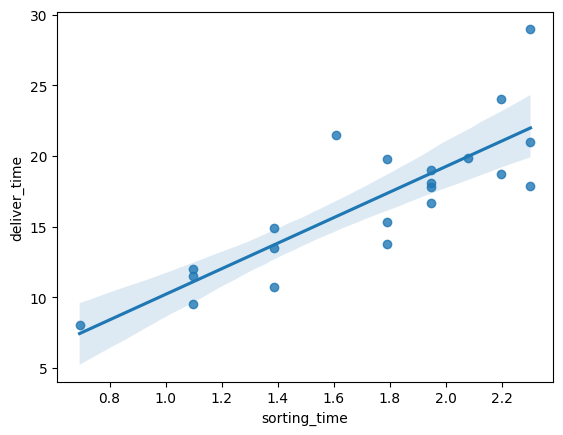

In [31]:
sns.regplot(x=np.log(df['sorting_time']),y=df['deliver_time'])

In [32]:
model_2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [33]:
print(model_2.tvalues)
print(model_2.pvalues)

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64
Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64


In [34]:
print(model_2.rsquared)
print(model_2.rsquared_adj)

0.6954434611324223
0.6794141696130761


In [35]:
model_3=smf.ols("np.log(deliver_time)~np.log(sorting_time)",data=df).fit()

<Axes: xlabel='sorting_time', ylabel='deliver_time'>

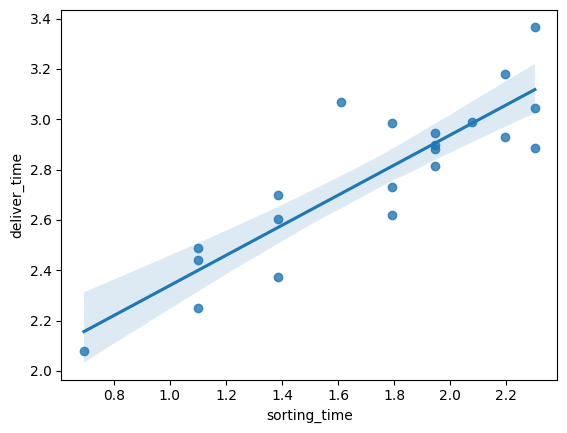

In [36]:
sns.regplot(x=np.log(df['sorting_time']),y=np.log(df['deliver_time']))

In [37]:
model_3.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [38]:
print(model_3.tvalues)
print(model_3.pvalues)

Intercept               13.085552
np.log(sorting_time)     8.024484
dtype: float64
Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [39]:
print(model_3.rsquared)
print(model_3.rsquared_adj)

0.77216134926874
0.7601698413355158


In [40]:
Table=pd.DataFrame({'Prep_Models':['model(SLR)','model_1(Exp)','model_2(Logarithm)','model_3(Log-Log)'],'Rsquared':[model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared],'Rsquared_Adj':[model.rsquared_adj,model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj]})
Table

,Prep_Models,Rsquared,Rsquared_Adj
0,model(SLR),0.682271,0.665549
1,model_1(Exp),0.710948,0.695735
2,model_2(Logarithm),0.695443,0.679414
3,model_3(Log-Log),0.772161,0.760170


In [41]:
Table=pd.DataFrame({'Prep_Models':['model(SLR)','model_1(Exp)','model_2(Logarithm)','model_3(Log-Log)'],'Rsquared':[model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared],'Rsquared_Adj':[model.rsquared_adj,model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj]})
Table

,Prep_Models,Rsquared,Rsquared_Adj
0,model(SLR),0.682271,0.665549
1,model_1(Exp),0.710948,0.695735
2,model_2(Logarithm),0.695443,0.679414
3,model_3(Log-Log),0.772161,0.760170


In [42]:
delivery_time = (1.741987) + (0.597522)*(np.log(6))
np.exp(delivery_time)

16.653205186140255

In [43]:
new_data=pd.DataFrame({'sorting_time':6},index=[0])
new_data

,sorting_time
0,6


In [44]:
np.exp(model_3.predict(new_data))

0    16.653216
dtype: float64

In [45]:
residuals = model_3.resid
residuals

0    -0.073311
1     0.032361
2     0.170550
3     0.123176
4     0.249463
5    -0.081488
6     0.039727
7    -0.147141
8    -0.233032
9    -0.123684
10    0.002696
11   -0.195423
12   -0.090501
13    0.043915
14    0.088971
15    0.129689
16   -0.191565
17   -0.008248
18   -0.076716
19   -0.023829
20    0.364391
dtype: float64

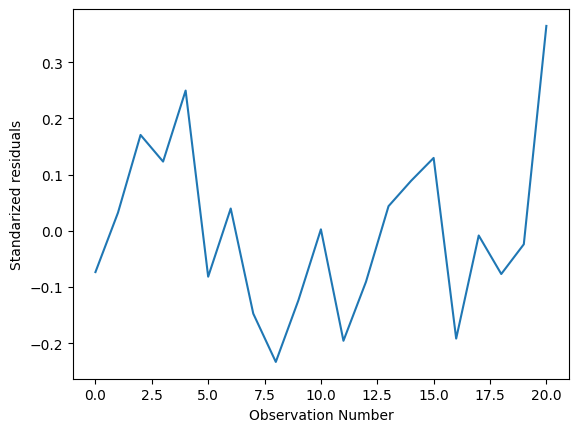

In [47]:
import matplotlib.pyplot as plt
plt.plot(residuals)
plt.xlabel('Observation Number')
plt.ylabel('Standarized residuals')
plt.show()

Salary_hike

In [49]:
data=pd.read_csv("C:\DataScience Assignments\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Shree\AppData\Local\Temp\ipykernel_10464\580572721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

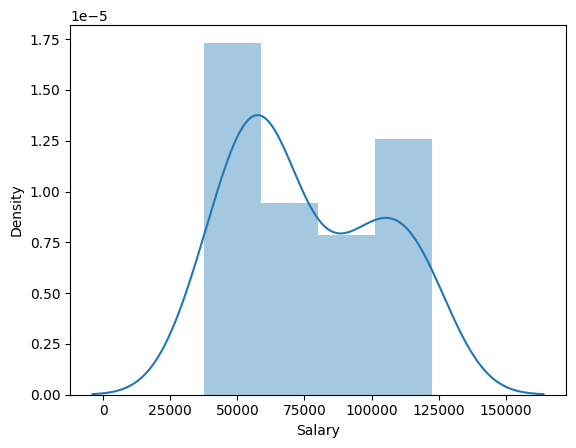

In [52]:
sns.distplot(data['Salary'])

C:\Users\Shree\AppData\Local\Temp\ipykernel_10464\1217533133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

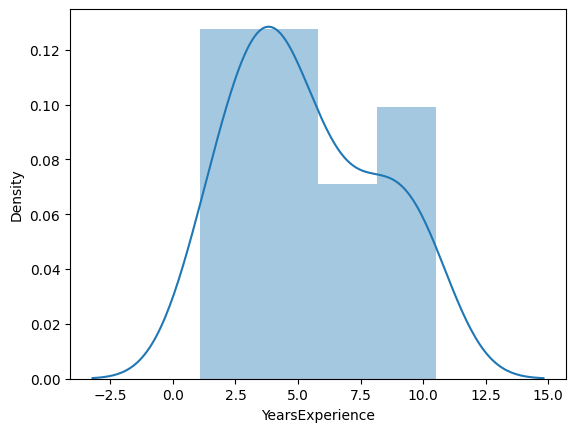

In [56]:
sns.distplot(data['YearsExperience'])

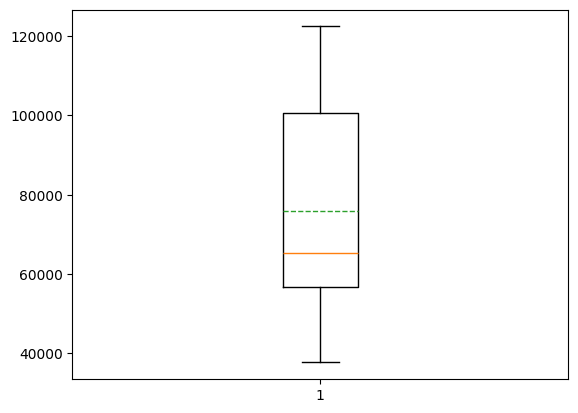

In [57]:
plt.boxplot(data['Salary'],meanline=True,showmeans=True)
plt.show()

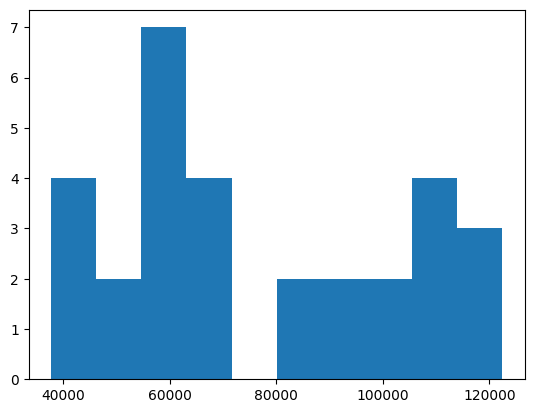

In [58]:
plt.hist(data['Salary'])
plt.show()

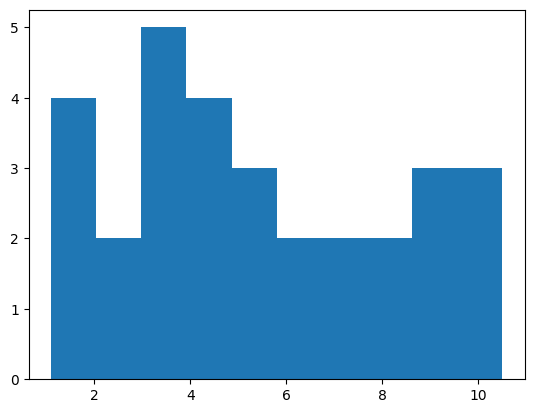

In [59]:
plt.hist(data['YearsExperience'])
plt.show()

<Axes: >

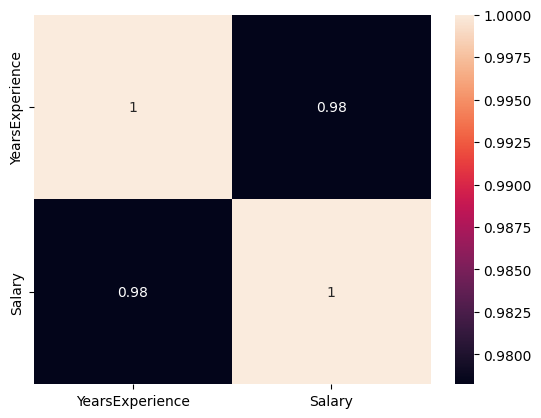

In [60]:
sns.heatmap(data.corr(),annot=True)

In [61]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

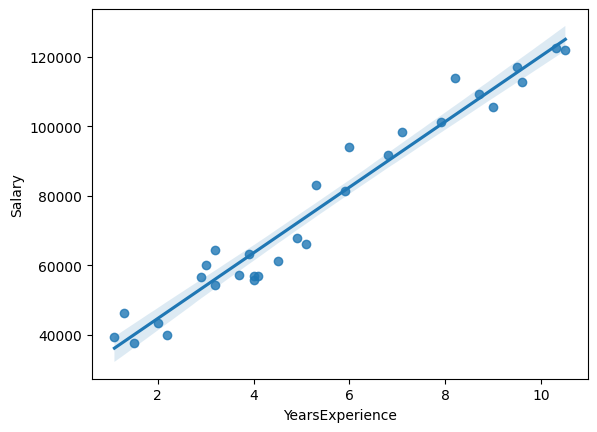

In [62]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [55]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
print(model.tvalues)
print(model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [64]:
print(model.rsquared)
print(model.rsquared_adj)

0.9569566641435086
0.9554194021486339


In [65]:
model_1=smf.ols("np.log(Salary)~YearsExperience",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

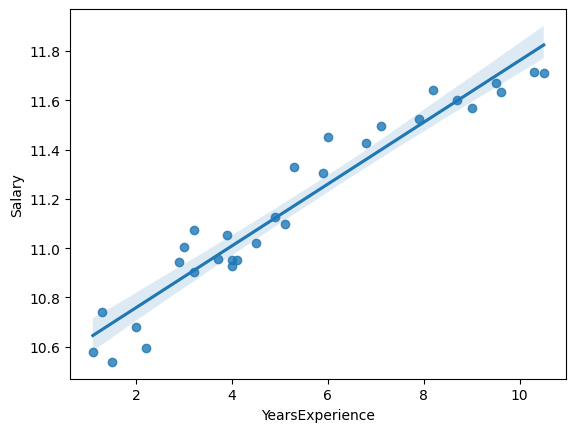

In [66]:
sns.regplot(x=data['YearsExperience'],y=np.log(data['Salary']))

In [67]:
model_1.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [68]:
print(model_1.tvalues)
print(model_1.pvalues)

Intercept          273.327166
YearsExperience     19.584833
dtype: float64
Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [69]:
print(model_1.rsquared)
print(model_1.rsquared_adj)

0.9319671194084195
0.9295373736730059


In [70]:
model_2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

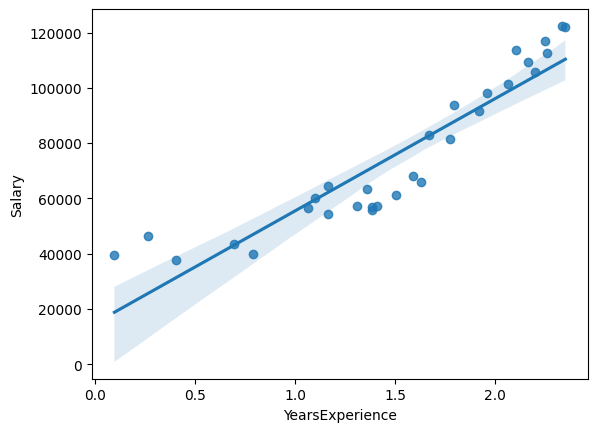

In [71]:
sns.regplot(x=np.log(data['YearsExperience']),y=data['Salary'])

In [72]:
model_2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [73]:
print(model_2.tvalues)
print(model_2.pvalues)

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64
Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [74]:
print(model_2.rsquared)
print(model_2.rsquared_adj)

0.8538888828756969
0.8486706286926861


In [75]:
model_3=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

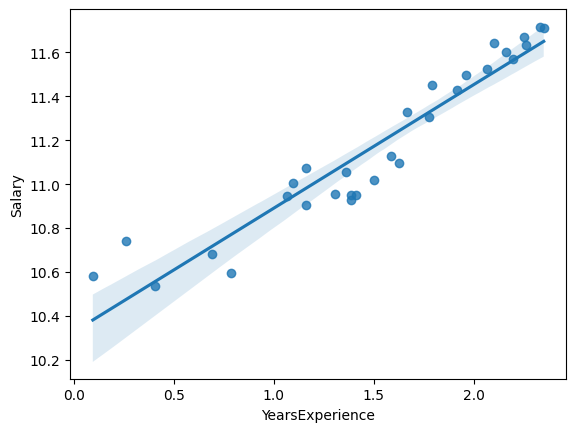

In [76]:
sns.regplot(x=np.log(data['YearsExperience']),y=np.log(data['Salary']))

In [77]:
model_3.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [78]:
print(model_3.tvalues)
print(model_3.pvalues)


Intercept                  184.867959
np.log(YearsExperience)     16.352542
dtype: float64
Intercept                  9.073132e-45
np.log(YearsExperience)    7.395278e-16
dtype: float64


In [79]:
print(model_3.rsquared)
print(model_3.rsquared_adj)

0.905215072581715
0.9018298966024905


In [80]:
Table=pd.DataFrame({'Prep_Models':['model(SLR)','model_1(Exp)','model_2(Logarithm)','model_3(Log-Log)'],'Rsquared':[model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared],'Rsquared_Adj':[model.rsquared_adj,model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj]})
Table

,Prep_Models,Rsquared,Rsquared_Adj
0,model(SLR),0.956957,0.955419
1,model_1(Exp),0.931967,0.929537
2,model_2(Logarithm),0.853889,0.848671
3,model_3(Log-Log),0.905215,0.901830


In [81]:
Salary = (25792.200199) + (9449.962321)*8
Salary

101391.898767

In [82]:
new_data=pd.DataFrame({'YearsExperience':8},index=[0])
new_data

,YearsExperience
0,8


In [83]:
model.predict(new_data)

0    101391.89877
dtype: float64

In [84]:
residuals = model.resid
residuals

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

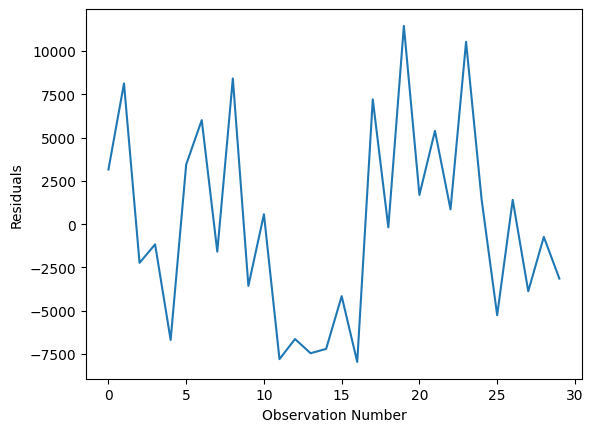

In [85]:
plt.plot(residuals)
plt.xlabel('Observation Number')
plt.ylabel('Residuals')
plt.show()